<a href="https://colab.research.google.com/github/iGhostlp/Albus/blob/Hermione/Proyecto_BBVA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

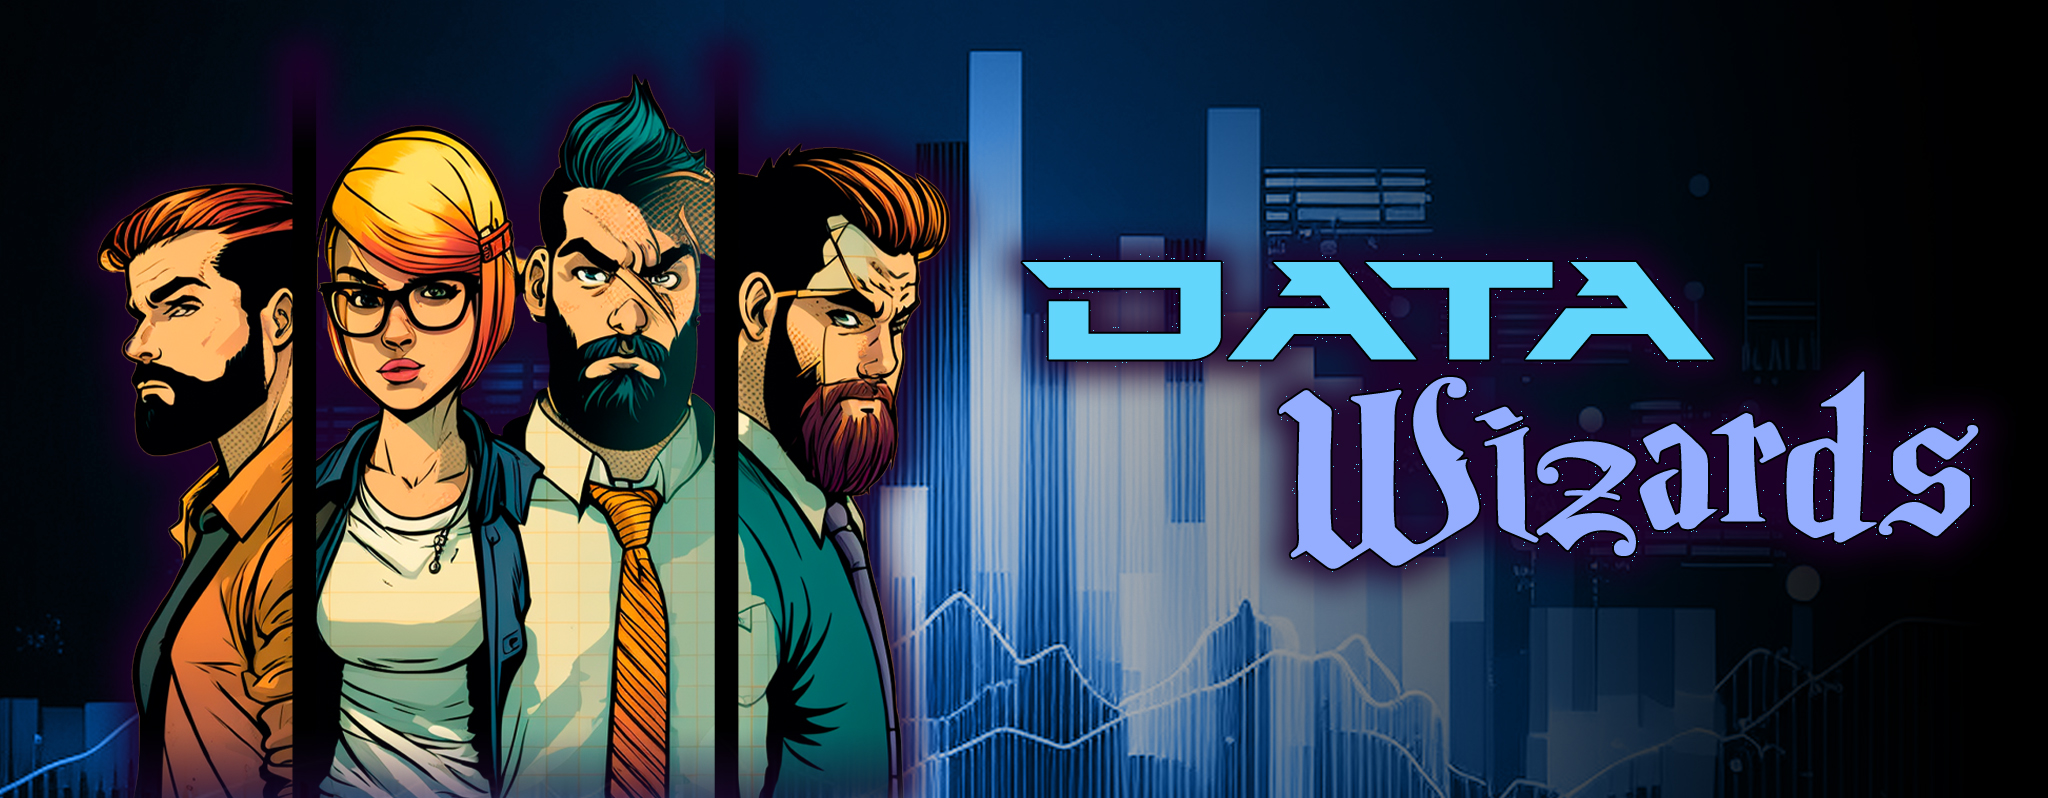

______________________________

Bootcamp interno de data 2023
______________________________

Equipo: Data Wizards
______________________________

Integrantes:
*   Marcos Manuel, Amato
*   Camila, Caresani
*   Lautaro Nicolás, López
*   Fernando Martín, Urbizaglia

______________________________


# Armado del entorno

In [ ]:
# Download Spark
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz

In [ ]:
# Unzip the file
!tar xf spark-3.3.2-bin-hadoop3.tgz

In [ ]:
!readlink -f $(which java) | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


In [ ]:
# Set up the environment for Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"
os.environ["SPARK_HOME"] = '/content/spark-3.3.2-bin-hadoop3'

In [ ]:
# Install library for finding Spark
!pip install -q findspark

# Import the libary
import findspark

# Initiate findspark
findspark.init()

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession

# Create a Spark Session
spark = SparkSession.builder.master("local[*]").config('spark.sql.parquet.datetimeRebaseModeInRead','CORRECTED').getOrCreate()

# Check Spark Session Information
spark

# Importado de funciones

In [ ]:
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat, concat_ws, col, row_number, desc, collect_list, to_json, struct, year, current_date, datediff, floor, when, lit
from pyspark.sql.window import Window

In [ ]:
#Creación de un SQL context
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# Carga de parquets

In [ ]:
df_customer = spark.read.parquet('/content/Datasets/customer_basics.snappy.parquet')
df_phones = spark.read.parquet('/content/Datasets/phones.snappy.parquet')
df_address = spark.read.parquet('/content/Datasets/address.snappy.parquet')
df_emails = spark.read.parquet('/content/Datasets/emails.snappy.parquet')
df_marital_status = spark.read.parquet('/content/Datasets/marital_status_type.parquet')
df_nationality = spark.read.parquet('/content/Datasets/nationality.parquet')

### Normalización de datos

In [ ]:
df_customer = df_customer.withColumnRenamed('last_change_date', 'l_c_d_customer')

In [ ]:
df_customer = df_customer.withColumn("job_type_desc", 
                                             when(df_customer.job_type == 1, 'REL.DEPENDENCIA/FIJO')
                                             .when(df_customer.job_type == 2, 'TEMPORAL')
                                             .when(df_customer.job_type == 3, 'AUTONOMO/INDEPENDIENTE')
                                             .when(df_customer.job_type == 3, 'OTROS')
                                             .otherwise("-"))

In [ ]:
df_marital_status_ok = df_marital_status.withColumn("marital_status_type", 
                                             when(df_marital_status.martial_status_short_desc == "NO INFORMA", 0)
                                             .when(df_marital_status.martial_status_short_desc == "CASADO/A  ", 1)
                                             .when(df_marital_status.martial_status_short_desc == "VIUDO/A   ", 2)
                                             .when(df_marital_status.martial_status_short_desc == "SEPARADO/A", 3)
                                             .when(df_marital_status.martial_status_short_desc == "DIVORCIADO", 4)
                                             .when(df_marital_status.martial_status_short_desc == "SOLTERO/A ", 5)
                                             .when(df_marital_status.martial_status_short_desc == "CONVIVIENT", 6)
                                             .when(df_marital_status.martial_status_short_desc == "OTROS     ", 7)
                                             .when(df_marital_status.martial_status_short_desc == "CONV. INSC", 8)
                                             .otherwise("-"))

# Extraccion de datos



### - 24 - Extraccion de datos desde parquet, clientes y teléfonos.
####Crear un DataFrame que contenga el JOIN de la tabla t_abtq_customer_basics y tabla t_abtq_customer_phones.

In [ ]:
df_customer_phones = df_phones.join(df_customer, 'customer_id')

In [ ]:
df_customer_phones.show()

+-----------+--------------+-------------------+-----------------+----------+----------------+---------------+-------------+-------------------+-----------------+-------------+-------------+---------------+-----------------------+------------------+---------------------+-----------------+----------+-----------+--------------------------+---------------------+--------------------+---------------------+----------------+-------------------------+-------------------------+------------------+-------------------+-----------------+--------------------+---------------------+-----------------------+----------------------+--------------------+----------------------+------------------------------+----------------------------+-------------------+----------------+----------------+-------------------+--------------------+-----------------------+---------------------+-------------+-------------+--------------+---------------+--------------------+---------+----------------+-----------+----------------

### - 25 - Extraccion de datos desde .parquet, clientes y direcciones
####Crear un DataFrame que contenga el JOIN de la tabla t_abtq_customer_basics y tabla t_abtq_customer_adress.

In [ ]:
df_customer_address = df_address.join(df_customer, 'customer_id')

In [ ]:
df_customer_address.show()

+-----------+-----------------------+-------------------+--------------+--------------------+------------------+---------------------------+-----------------+-------------+---------------------+--------------------+-----------------------+----------+---------------+-----------+------------------+----------------------+-------------------------+------------------+---------------------+------------------------------+-----------------------+--------------------+---------------------+------------------+-------------------------+-------------------------+------------------+-----------------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+----------------------+------------------------------+----------------------------+------------------------+-------------------+----------------+----------------+-------------------+--------------------+-----------------------+-----------------+---------------------+-------------+---

### - 26 - Extraccion de datos desde .parquet, clientes y correos electrónicos
#### Crear un DataFrame que contenga el JOIN de la tabla t_abtq_customer_basics y tabla t_abtq_customer_email.   

In [ ]:
df_customer_emails = df_emails.join(df_customer, 'customer_id')

In [ ]:
df_customer_emails.show()

+-----------+---------+-------------------+--------------+----------+------------------+--------------------+-----------------+--------------+-------------------+----------------+--------------------------+--------------+----------------+-------------------+--------------------+-----------------------+---------------------+--------------------------+-------------------+----------------+-------------+-------------+--------------+---------------+--------------------+---------+----------------+-----------+-----------------------+-----------------------+----------+-------------------+-----------------+--------------------------+------------------+----------------+-----------------+-------------------+-----------+----------+----------------------+--------------------+---------------------+-----------+--------------------------+----------------------------+-------------------------------+------------------------+------------------------+--------------------------+------------------------+---

# Filtrar datos, reducir volumen

####- 27 - Filtrar el DataFrame de contactos telefónicos de clientes y resguardar los 3 contactos más actuales por cliente.

In [ ]:
df_customer_phones_sorted = df_customer_phones.orderBy([df_customer_phones.customer_id, desc('last_change_date')])

In [ ]:
window = Window.partitionBy(df_customer_phones_sorted.customer_id).orderBy(desc(df_customer_phones_sorted.last_change_date))

In [ ]:
df_phone_contact = df_customer_phones_sorted.withColumn('row_num', row_number().over(window))
df_phone_contact = df_phone_contact.filter(df_phone_contact.row_num <= 3)

In [ ]:
df_phone_contact = df_phone_contact.withColumn("full_phone", concat_ws("-", 'prefix_phone_id', 'phone_area_id', 'phone_exchange_id', 'phone_line_id'))

In [ ]:
df_pivot_pc = df_phone_contact.groupBy('customer_id').agg(collect_list('full_phone').alias('last_3_changes_list'))

In [ ]:
df_pivot_phone = df_pivot_pc.selectExpr('customer_id', 'last_3_changes_list[0] as phone_1', 'last_3_changes_list[1] as phone_2', 'last_3_changes_list[2] as phone_3')

In [ ]:
df_pivot_phone = df_pivot_phone.na.fill('---')
df_pivot_phone.show()

+-----------+---------------+---------------+-------+
|customer_id|        phone_1|        phone_2|phone_3|
+-----------+---------------+---------------+-------+
|   00221785|54-11-3696-6021|            ---|    ---|
|   00585832|54-11-5339-4383|            ---|    ---|
|   00857998|54-388-409-9742|            ---|    ---|
|   00890271|54-11-2492-4876|            ---|    ---|
|   01035263|54-294-425-7373|            ---|    ---|
|   01042668|54-11-2295-2413|            ---|    ---|
|   01136850|54-11-6959-8581|            ---|    ---|
|   01508497|54-11-3868-8489|            ---|    ---|
|   01552941|54-11-3104-0391|            ---|    ---|
|   01554790|54-11-3096-4113|            ---|    ---|
|   01867148|54-263-444-9082|            ---|    ---|
|   01944559|54-3462-23-4113|54-3462-42-2372|    ---|
|   01967286|54-11-5961-9424|54-11-5329-3089|    ---|
|   02394468|54-221-461-6821|54-11-6513-6425|    ---|
|   02409159|54-336-434-6906|            ---|    ---|
|   02425744|54-261-255-1104

####- 28 - Filtrar el DataFrame de direcciones de clientes y resguardar los 3 contactos más actuales por cliente.

In [ ]:
df_customer_address_sorted = df_customer_address.orderBy([df_customer_address.customer_id, desc('last_change_date')])

In [ ]:
window = Window.partitionBy(df_customer_address_sorted.customer_id).orderBy(desc(df_customer_address_sorted.last_change_date))

In [ ]:
df_address_contact = df_customer_address_sorted.withColumn('row_num', row_number().over(window))
df_address_contact = df_address_contact.filter(df_address_contact.row_num <= 3)

In [ ]:
df_address_contact = df_address_contact.withColumn("full_address", concat('street_name', 'address_outdoor_id', 'address_indoor_id', 'indoor_number', 'address_department_name', 'province_id', 'zipcode_id'))

In [ ]:
df_pivot_ad = df_address_contact.groupBy('customer_id').agg(collect_list('full_address').alias('last_3_changes_list'))

In [ ]:
df_pivot_address = df_pivot_ad.selectExpr('customer_id', 'last_3_changes_list[0] as address_1', 'last_3_changes_list[1] as address_2', 'last_3_changes_list[2] as address_3')

In [ ]:
df_pivot_address = df_pivot_address.na.fill('---')
df_pivot_address.show()

+-----------+--------------------+---------+---------+
|customer_id|           address_1|address_2|address_3|
+-----------+--------------------+---------+---------+
|   00000442|AGUERO           ...|      ---|      ---|
|   00001419|ALTE G BROWN     ...|      ---|      ---|
|   00001939|JOSE HERNANDEZ   ...|      ---|      ---|
|   00002707|GUATEMALA        ...|      ---|      ---|
|   00002790|AV CORDOBA       ...|      ---|      ---|
|   00004287|CNEL DE MARINA RO...|      ---|      ---|
|   00004724|PJE MUTUALISMO   ...|      ---|      ---|
|   00007932|AV FELIX DE OLAZA...|      ---|      ---|
|   00011850|JUNCAL           ...|      ---|      ---|
|   00012051|AV GRAL JOSE MARI...|      ---|      ---|
|   00012611|ALBERTO LARROQUE ...|      ---|      ---|
|   00013498|AV PTE H YRIGOYEN...|      ---|      ---|
|   00014664|AV TRIUNVIRATO   ...|      ---|      ---|
|   00015497|VUELTA DE OBLIGAD...|      ---|      ---|
|   00051576|ING GUILLERMO MAR...|      ---|      ---|
|   000539

####- 29 - Filtrar el DataFrame de correos electrónicos de clientes  y resguardar los 3 contactos más actuales por cliente. 

In [ ]:
df_customer_emails_sorted = df_customer_emails.orderBy([df_customer_emails.customer_id, desc('last_change_date')])

In [ ]:
window = Window.partitionBy(df_customer_emails_sorted.customer_id).orderBy(desc(df_customer_emails_sorted.last_change_date))

In [ ]:
df_email_contact = df_customer_emails_sorted.withColumn('row_num', row_number().over(window))
df_email_contact = df_email_contact.filter(df_email_contact.row_num <= 3)

In [ ]:
df_pivot_ec = df_email_contact.groupBy('customer_id').agg(collect_list('email_desc').alias('last_3_changes_list'))

In [ ]:
df_pivot_email = df_pivot_ec.selectExpr('customer_id', 'last_3_changes_list[0] as email_1', 'last_3_changes_list[1] as email_2', 'last_3_changes_list[2] as email_3')

In [ ]:
df_pivot_email = df_pivot_email.na.fill('---')
df_pivot_email.show()

+-----------+--------------------+--------------------+-------+
|customer_id|             email_1|             email_2|email_3|
+-----------+--------------------+--------------------+-------+
|   00001419|  JU_LY1@HOTMAIL.COM|EMILIA.RUBIANES@H...|    ---|
|   00002790| NOTIENE@HOIMAIL.COM|DIGITALIZACION@EE...|    ---|
|   00014664|   alq@ciudad.com.ar|                 ---|    ---|
|   00056407|NELLY.S.GEREZ@GMA...|                 ---|    ---|
|   00058801|SOPLETESHLANDA@HO...|SOPLETESHLANDA@HO...|    ---|
|   00058909|jmanau@fibertel.c...|                 ---|    ---|
|   00061198|GUSTAVOGARCIA2009...|                 ---|    ---|
|   00079642| MARITA@4HOTMAIL.COM|                 ---|    ---|
|   00096670|CONTACTO@COMPRESO...|                 ---|    ---|
|   00098340|NELLYARNONI@YAHOO...|                 ---|    ---|
|   00099612|GRA.SOUTO@HOTMAIL...|                 ---|    ---|
|   00100409|JULIUSORTEGUS5@GM...|JULIUSCORTGUS5@GM...|    ---|
|   00101437|   NOTIENE@GMAIL.COM|      

# Enrequecimiento de datos

####- 30 - Agregar una nueva columna a los DataFrame de contactos, indicando el contact_type según corresponda (address, email, phone)

In [ ]:
df_pivot_phone_col = df_pivot_phone.withColumn('contact_type_phones', lit('phone'))
df_pivot_phone_col.show()

+-----------+---------------+---------------+-------+-------------------+
|customer_id|        phone_1|        phone_2|phone_3|contact_type_phones|
+-----------+---------------+---------------+-------+-------------------+
|   00221785|54-11-3696-6021|            ---|    ---|              phone|
|   00585832|54-11-5339-4383|            ---|    ---|              phone|
|   00857998|54-388-409-9742|            ---|    ---|              phone|
|   00890271|54-11-2492-4876|            ---|    ---|              phone|
|   01035263|54-294-425-7373|            ---|    ---|              phone|
|   01042668|54-11-2295-2413|            ---|    ---|              phone|
|   01136850|54-11-6959-8581|            ---|    ---|              phone|
|   01508497|54-11-3868-8489|            ---|    ---|              phone|
|   01552941|54-11-3104-0391|            ---|    ---|              phone|
|   01554790|54-11-3096-4113|            ---|    ---|              phone|
|   01867148|54-263-444-9082|         

In [ ]:
df_pivot_address_col = df_pivot_address.withColumn('contact_type_address', lit('address'))
df_pivot_address_col.show()

+-----------+--------------------+---------+---------+--------------------+
|customer_id|           address_1|address_2|address_3|contact_type_address|
+-----------+--------------------+---------+---------+--------------------+
|   00000442|AGUERO           ...|      ---|      ---|             address|
|   00001419|ALTE G BROWN     ...|      ---|      ---|             address|
|   00001939|JOSE HERNANDEZ   ...|      ---|      ---|             address|
|   00002707|GUATEMALA        ...|      ---|      ---|             address|
|   00002790|AV CORDOBA       ...|      ---|      ---|             address|
|   00004287|CNEL DE MARINA RO...|      ---|      ---|             address|
|   00004724|PJE MUTUALISMO   ...|      ---|      ---|             address|
|   00007932|AV FELIX DE OLAZA...|      ---|      ---|             address|
|   00011850|JUNCAL           ...|      ---|      ---|             address|
|   00012051|AV GRAL JOSE MARI...|      ---|      ---|             address|
|   00012611

In [ ]:
df_pivot_email_col = df_pivot_email.withColumn('contact_type_emails', lit('e-mail'))
df_pivot_email_col.show()

+-----------+--------------------+--------------------+-------+-------------------+
|customer_id|             email_1|             email_2|email_3|contact_type_emails|
+-----------+--------------------+--------------------+-------+-------------------+
|   00001419|  JU_LY1@HOTMAIL.COM|EMILIA.RUBIANES@H...|    ---|             e-mail|
|   00002790| NOTIENE@HOIMAIL.COM|DIGITALIZACION@EE...|    ---|             e-mail|
|   00014664|   alq@ciudad.com.ar|                 ---|    ---|             e-mail|
|   00056407|NELLY.S.GEREZ@GMA...|                 ---|    ---|             e-mail|
|   00058801|SOPLETESHLANDA@HO...|SOPLETESHLANDA@HO...|    ---|             e-mail|
|   00058909|jmanau@fibertel.c...|                 ---|    ---|             e-mail|
|   00061198|GUSTAVOGARCIA2009...|                 ---|    ---|             e-mail|
|   00079642| MARITA@4HOTMAIL.COM|                 ---|    ---|             e-mail|
|   00096670|CONTACTO@COMPRESO...|                 ---|    ---|             

####- 31 - Agregar una nueva columna al DataFrame de contactos telefónicos de clientes, resguardando el contacto en formato json contenido en string, con los datos: Phone_type (mobile, landline ), Código país., Código de Área, Número teléfono.

In [ ]:
df_phone_contact = df_phone_contact.withColumn("phone_contact", to_json(struct(df_phone_contact.phone_type, df_phone_contact.phone_country_id, df_phone_contact.prefix_phone_id, df_phone_contact.phone_area_id, df_phone_contact.cellphone_prefix_id, df_phone_contact.phone_exchange_id, df_phone_contact.phone_line_id)))

In [ ]:
df_phone_contact.show(truncate=False)

+-----------+--------------+-------------------+-----------------+----------+----------------+---------------+-------------+-------------------+-----------------+-------------+------------+---------------+-----------------------+------------------+---------------------+-----------------+----------+-----------+--------------------------+---------------------+--------------------+---------------------+----------------+-------------------------+-------------------------+------------------+-------------------+-----------------+--------------------+---------------------+-----------------------+----------------------+--------------------+----------------------+------------------------------+----------------------------+-------------------+----------------+----------------+-------------------+--------------------+-----------------------+-----------------------+-------------+-------------+--------------+---------------+--------------------+---------+----------------+-----------+---------------

####- 32 - Agregar una nueva columna al DataFrame de direcciones de clientes, resguardando el contacto en formato json contenido en string, con los datos: Calle, Número, Piso, Depto, Localidad, Provincia, Código postal

In [ ]:
df_address_contact = df_address_contact.withColumn("address_contact",to_json(struct(df_address_contact.street_name,df_address_contact.address_outdoor_id,df_address_contact.address_indoor_id,df_address_contact.indoor_number,df_address_contact.address_district_name, df_address_contact.address_town_name,df_address_contact.zipcode_id)))

In [ ]:
df_address_contact.show(truncate=False)

+-----------+-----------------------+-------------------+--------------+------------------------+------------------+---------------------------+-----------------+-------------+------------------------------+------------------------------+------------------------------+----------+---------------+-----------+------------------+------------------------------------------------------------+-------------------------+------------------+---------------------+------------------------------+-----------------------+--------------------+---------------------+------------------+-------------------------+-------------------------+------------------+-----------------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+----------------------+------------------------------+----------------------------+------------------------+-------------------+----------------+----------------+-------------------+--------------------+-------------

####- 33 - Combinar los DataFrame de contactos telefónicos de clientes, direcciones de clientes y email de clientes en uno solo.

In [ ]:
df_contacts = df_pivot_phone.join(df_pivot_email, "customer_id", how='full').join(df_pivot_address, "customer_id", how='full')
df_contacts = df_contacts.na.fill('---')

In [ ]:
df_contacts.show(truncate=False)

+-----------+-------+-------+-------+--------------------------+---------------------------+-------+-----------------------------------------------------------------------------------+---------+---------+
|customer_id|phone_1|phone_2|phone_3|email_1                   |email_2                    |email_3|address_1                                                                          |address_2|address_3|
+-----------+-------+-------+-------+--------------------------+---------------------------+-------+-----------------------------------------------------------------------------------+---------+---------+
|00000442   |---    |---    |---    |---                       |---                        |---    |AGUERO                  0000842PB      B      112233114455                  0101171|---      |---      |
|00001419   |---    |---    |---    |JU_LY1@HOTMAIL.COM        |EMILIA.RUBIANES@HOTMAIL.COM|---    |ALTE G BROWN            00010741       A      MORON                         0201

In [ ]:
df_short_contacts = df_contacts.select('customer_id','Phone_1','Email_1','Address_1')
df_short_contacts.show()

+-----------+-------+--------------------+--------------------+
|customer_id|Phone_1|             Email_1|           Address_1|
+-----------+-------+--------------------+--------------------+
|   00000442|   null|                null|AGUERO           ...|
|   00001419|   null|  JU_LY1@HOTMAIL.COM|ALTE G BROWN     ...|
|   00001939|   null|                null|JOSE HERNANDEZ   ...|
|   00002707|   null|                null|GUATEMALA        ...|
|   00002790|   null| NOTIENE@HOIMAIL.COM|AV CORDOBA       ...|
|   00004287|   null|                null|CNEL DE MARINA RO...|
|   00004724|   null|                null|PJE MUTUALISMO   ...|
|   00007932|   null|                null|AV FELIX DE OLAZA...|
|   00011850|   null|                null|JUNCAL           ...|
|   00012051|   null|                null|AV GRAL JOSE MARI...|
|   00012611|   null|                null|ALBERTO LARROQUE ...|
|   00013498|   null|                null|AV PTE H YRIGOYEN...|
|   00014664|   null|   alq@ciudad.com.a

----

In [ ]:
df_contact_types = df_pivot_phone_col.join(df_pivot_address_col, 'customer_id', how='full').join(df_emails_contact_col, 'customer_id', how='full')
df_contact_types = df_contact_types.na.fill('---')

In [ ]:
df_contact_types.select('customer_id','contact_type_phones','contact_type_address','contact_type_emails').show()

+-----------+-------------------+--------------------+-------------------+
|customer_id|contact_type_phones|contact_type_address|contact_type_emails|
+-----------+-------------------+--------------------+-------------------+
|   00000007|              phone|                 ---|                ---|
|   00000188|                ---|             address|                ---|
|   00000204|                ---|             address|                ---|
|   00000228|                ---|             address|                ---|
|   00000274|                ---|             address|                ---|
|   00000282|                ---|             address|                ---|
|   00000305|                ---|             address|                ---|
|   00000381|              phone|                 ---|                ---|
|   00000429|                ---|             address|                ---|
|   00000445|                ---|             address|                ---|
|   00000451|            

# Creacion de vistas temporales

####- 35 - Generar una vista temporal a partir del DataFrame de contactos.

In [ ]:
df_short_contacts.createTempView('tw_contacts')

####- 36 - Generar una vista temporal a partir del archivo t_abtq_customer_basics.

In [ ]:
df_customer.createOrReplaceTempView('tw_customer_basics')

####- 37 - Generar una vista temporal a partir del archivo t_acog_marital_status_type.

In [ ]:
df_marital_status_ok.createOrReplaceTempView('tw_marital_status')

####- 38 - Generar una vista temporal a partir del archivo t_acog_nationality.

In [ ]:
df_nationality.createOrReplaceTempView("tw_nationality")

# Querys en spark SQL.

####- 39 - Generar un público objetivo (1) que cumpla los siguientes puntos:
* Cliente
* Antigüedad superior a 5 años
* Asalariado Fijo.
* Estado civil: Casado


In [ ]:
query_1 = '''
SELECT c.*, floor(datediff(current_date(), admission_date)/365) as customer_seniority, customer_condition_type, cb.job_type_desc, ms.martial_status_short_desc 
FROM tw_customer_basics as cb 
INNER JOIN tw_contacts as c
ON cb.customer_id == c.customer_id
INNER JOIN tw_marital_status as ms 
ON cb.marital_status_type = ms.marital_status_type 
WHERE floor(datediff(current_date(), admission_date)/365) > 5 
AND cb.marital_status_type = 01 
AND cb.job_type = 001 
AND cb.customer_condition_type = 1
'''

In [ ]:
publico_obj1 = sqlContext.sql(f'{query_1}')
publico_obj1.toPandas()

,customer_id,Phone_1,Email_1,Address_1,customer_seniority,customer_condition_type,job_type_desc,martial_status_short_desc
0,00079624,None,None,FRAGATA TRINIDAD 0001863 ...,29,1,REL.DEPENDENCIA/FIJO,CASADO/A
1,00080625,None,None,CERROS COLORADOS 0001348PB ...,30,1,REL.DEPENDENCIA/FIJO,CASADO/A
2,00101437,None,NOTIENE@GMAIL.COM,CALLE 51 0000420 ...,29,1,REL.DEPENDENCIA/FIJO,CASADO/A
3,00403678,None,None,POETA ROMILDO RISSO 0003721 ...,27,1,REL.DEPENDENCIA/FIJO,CASADO/A
4,00403970,None,None,AV EVA PERON 000164411 E ...,26,1,REL.DEPENDENCIA/FIJO,CASADO/A
...,...,...,...,...,...,...,...,...
245,30255141,54-2657-20-3098,None,None,24,1,REL.DEPENDENCIA/FIJO,CASADO/A
246,30328753,54-385-583-1138,None,None,12,1,REL.DEPENDENCIA/FIJO,CASADO/A
247,30525851,54-341-753-5297,None,None,13,1,REL.DEPENDENCIA/FIJO,CASADO/A
248,30757388,54-3888-65-8275,None,None,15,1,REL.DEPENDENCIA/FIJO,CASADO/A


####- 40 -  Generar un público objetivo (2) que cumpla los siguientes puntos:
* Potencial Cliente
* Sexo Femenino
* Entre 30 y 45 años de Edad.
* Nacionalidad No Argentina

In [ ]:
query_2 = '''
SELECT c.*, customer_condition_type, gender_type, floor(datediff(current_date(), birth_date)/365) as customer_age, n.country_name 
FROM tw_customer_basics AS cb 
INNER JOIN tw_contacts as c
ON cb.customer_id == c.customer_id
INNER JOIN tw_nationality AS n 
ON cb.country_nationality_id == n.country_nationality_id 
WHERE floor(datediff(current_date(), birth_date)/365) > 30 
AND floor(datediff(current_date(), birth_date)/365) < 45 
AND gender_type = "F" AND customer_condition_type = 1 
AND n.country_nationality_id <> 80
'''

In [ ]:
publico_obj2 = sqlContext.sql(f'{query_2}')
publico_obj2.toPandas()

,customer_id,Phone_1,Email_1,Address_1,customer_condition_type,gender_type,customer_age,country_name
0,08576564,None,NOTIENE@NOTIENE.COM,DIAG HONDURAS 0005950 ...,1,F,44,PARAGUAY
1,22184167,None,None,VIRREY LINIERS 00036072 ...,1,F,33,CHINA


####- 41 - Generar un público objetivo (3) que cumpla los siguientes puntos:
* Potencial Cliente
* Sexo Masculino.
* Mayor a 25 años.
* Estado civil Soltero

In [ ]:
query_3 = '''
SELECT c.*, customer_condition_type, gender_type, floor(datediff(current_date(), birth_date)/365) as customer_age, ms.martial_status_short_desc 
FROM tw_customer_basics AS cb 
INNER JOIN tw_contacts as c
ON cb.customer_id == c.customer_id
INNER JOIN tw_marital_status as ms 
ON cb.marital_status_type = ms.marital_status_type 
WHERE customer_condition_type = 1 
AND floor(datediff(current_date(), birth_date)/365) > 25 
AND gender_type = "M" 
AND cb.marital_status_type = 5
'''

In [ ]:
publico_obj3 = sqlContext.sql(f'{query_3}')
publico_obj3.toPandas()

,customer_id,Phone_1,Email_1,Address_1,customer_condition_type,gender_type,customer_age,martial_status_short_desc
0,00221785,54-11-3696-6021,None,None,1,M,29,SOLTERO/A
1,00468968,None,None,ARRIBE�OS 000168410 ...,1,M,90,SOLTERO/A
2,00730948,None,WEI7082@GMAIL.COM,AV CASEROS 00029212 8 ...,1,M,64,SOLTERO/A
3,00731569,None,None,BLANCO ENCALADA 00028515 H ...,1,M,63,SOLTERO/A
4,00737446,None,None,9 DE JULIO 0004550 ...,1,M,64,SOLTERO/A
...,...,...,...,...,...,...,...,...
294,30742242,54-11-3680-3901,None,None,1,M,29,SOLTERO/A
295,30758657,54-11-6516-8020,None,None,1,M,54,SOLTERO/A
296,30827736,54-221-453-8798,None,None,1,M,28,SOLTERO/A
297,30904389,54-11-3841-9541,None,None,1,M,52,SOLTERO/A


####- 42 - Generar un público objetivo (4) que cumpla los siguientes puntos:
* Cliente
* Edad superior a 52 años
* Nacionalidad Argentina
* Estado civil Viudo

In [ ]:
query_4 = '''
SELECT c.*, floor(datediff(current_date(), birth_date)/365) as customer_age, n.country_name, ms.martial_status_short_desc 
FROM tw_customer_basics as cb 
INNER JOIN tw_contacts as c
ON cb.customer_id == c.customer_id
INNER JOIN tw_nationality AS n 
ON cb.country_nationality_id == n.country_nationality_id 
INNER JOIN tw_marital_status as ms 
ON cb.marital_status_type = ms.marital_status_type 
WHERE floor(datediff(current_date(), birth_date)/365) > 52 
AND cb.country_nationality_id = 80 
AND cb.marital_status_type = 2
'''

In [ ]:
publico_obj4 = sqlContext.sql(f'{query_4}')
publico_obj4.toPandas()

,customer_id,Phone_1,Email_1,Address_1,customer_age,country_name,martial_status_short_desc
0,00014664,None,alq@ciudad.com.ar,AV TRIUNVIRATO 0004337PB C ...,102,ARGENTINA,VIUDO/A
1,00093940,None,None,RENACIMIENTO 0000484 ...,101,ARGENTINA,VIUDO/A
2,00104838,None,None,OLAVARRIA 00019501 52 ...,95,ARGENTINA,VIUDO/A
3,01193254,None,SC@GMAIL.COM,AV CORDOBA 0002122 ...,88,ARGENTINA,VIUDO/A
4,02507194,None,None,CRUZ DEL SUR 0001850 ...,73,ARGENTINA,VIUDO/A
5,03637822,None,None,GRAL JUAN LAVALLE 00029551 A ...,92,ARGENTINA,VIUDO/A
6,03925479,None,None,POLA 000400026 C ...,57,ARGENTINA,VIUDO/A
7,04076446,None,MARCELAVIVIANA29@YAHOO.COM.AR,ALTE CORDERO 0002559 ...,104,ARGENTINA,VIUDO/A
8,04161701,None,DANIELTUSET79@GMAIL.COM,CNEL MARTIN IRIGOYEN 00005745 B ...,87,ARGENTINA,VIUDO/A
9,04191069,None,None,JUJUY 00002771 A ...,89,ARGENTINA,VIUDO/A


# Carga de datos, generacion de archivos .csv
#### Los archivos deben cumplir los siguientes requerimientos: 
* Contener cabecera. 
* Separador “|”. 
* Máximo de 1000 registros por archivo (si el público objetivo tiene más de 1000 registros, se deberá crear más de un archivo)
* Ser guardados en HDFS.

#### - 43 -  Generar archivos .csv a partir de los público objetivo 1. 


In [ ]:
publico_obj1.write \
  .option("delimiter", "|") \
  .option("header", "true") \
  .csv("Datasets/P1")

#### - 44 - Generar archivos .csv a partir del público objetivo 2. 

In [ ]:
publico_obj2.write \
  .option("delimiter", "|") \
  .option("header", "true") \
  .csv("Datasets/P2")

####- 45 - Generar archivos .csv a partir del público objetivo 3. 

In [ ]:
publico_obj3.write \
  .option("delimiter", "|") \
  .option("header", "true") \
  .csv("Datasets/P3")

####- 46 - Generar archivos .csv a partir del público objetivo 4. 

In [ ]:
publico_obj4.write \
  .option("delimiter", "|") \
  .option("header", "true") \
  .csv("Datasets/P4")

# Conclusión

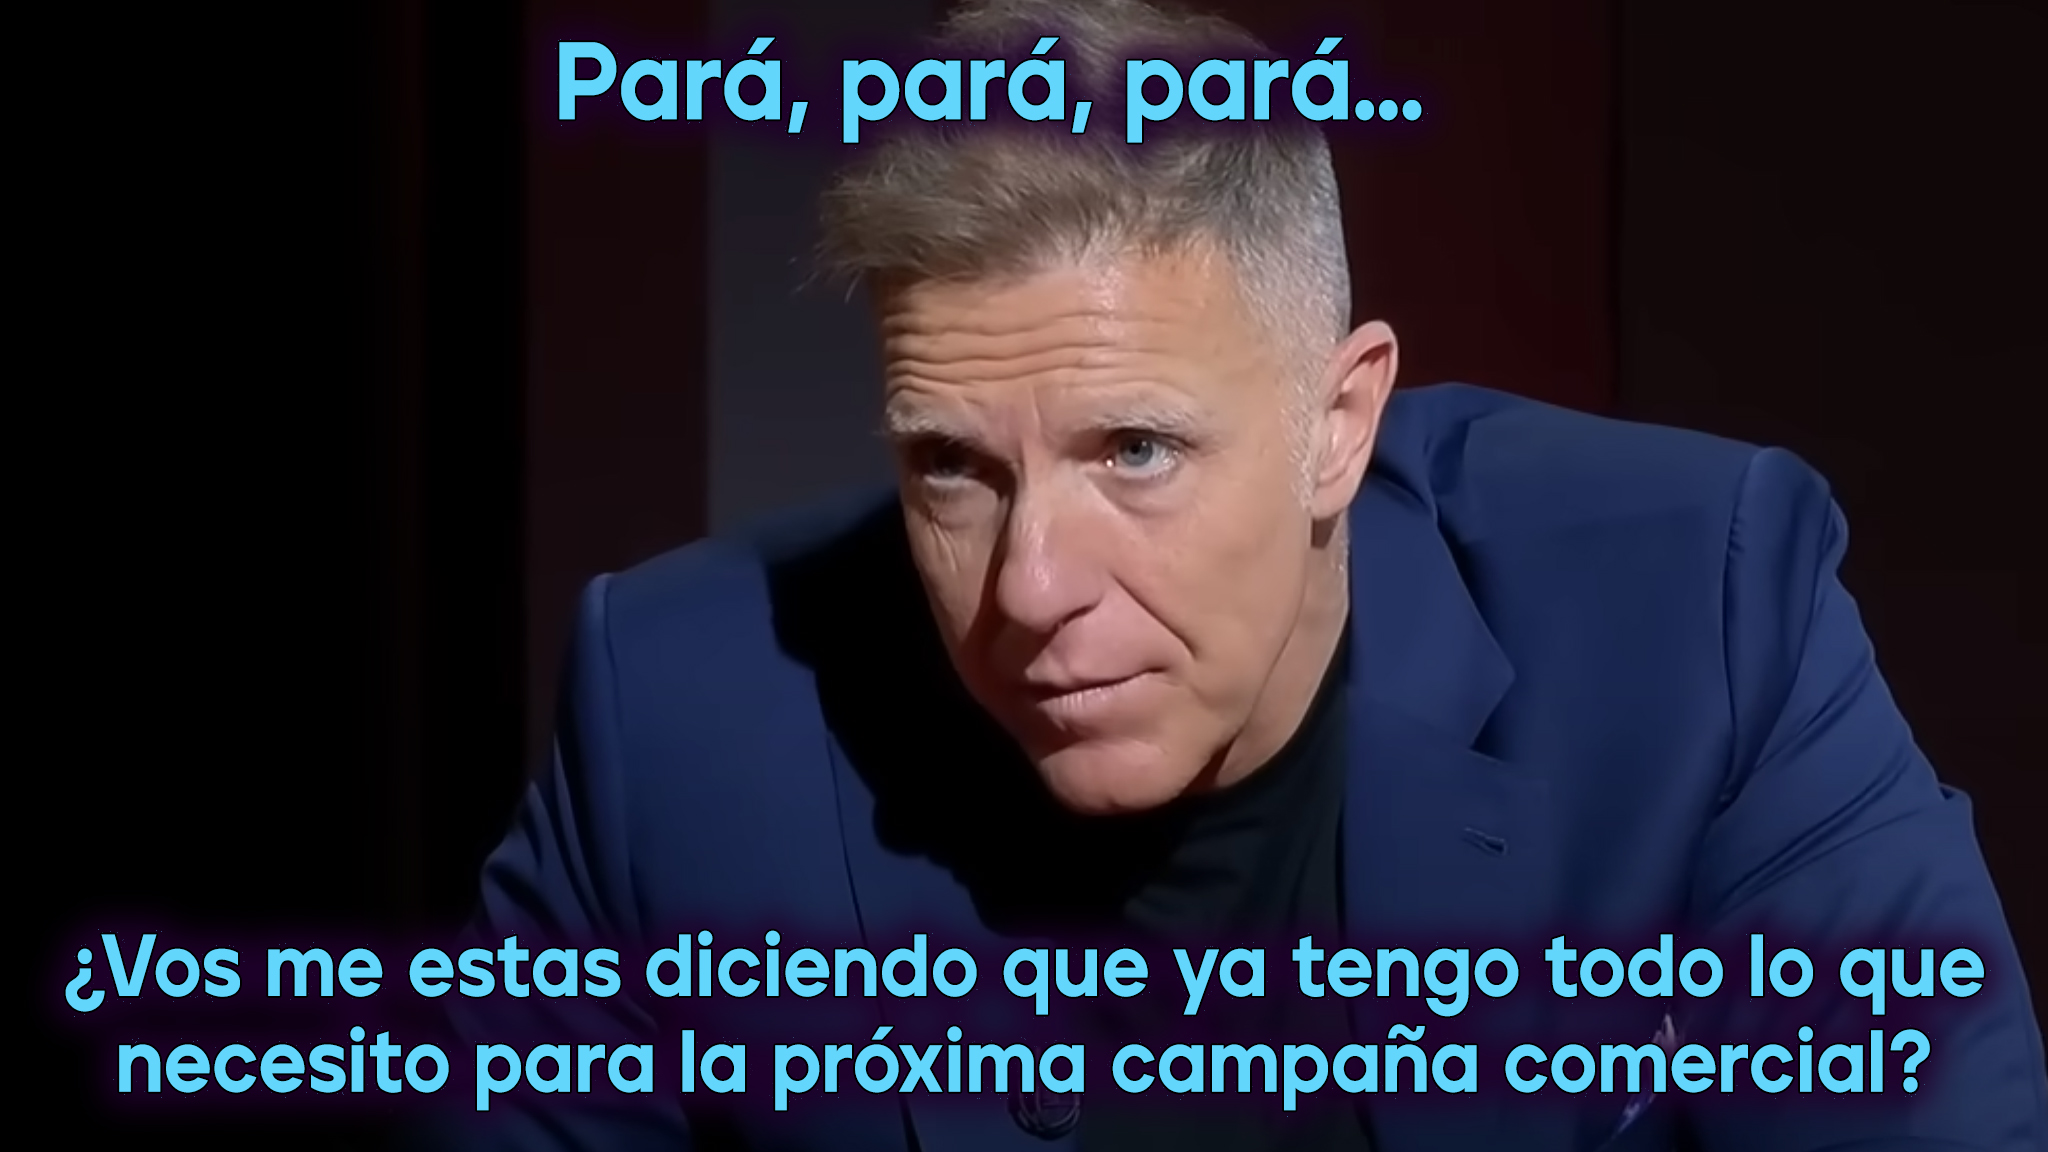